# Bag of Words implementation

In [6]:
%matplotlib nbagg

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler

### Kmeans++

In [2]:
def getPermutation(totalRange,numberElements):
    random_seed = 10312003
    rng = np.random.RandomState(random_seed)
    permutation = rng.permutation(totalRange)
    return permutation[:numberElements]


def mykmeans_plus_plus(X, max_clusters = 8, max_iterations=1000):
    randState = 10312003
    rnd = np.random.RandomState(randState)
    centroids=generateStartingCentroid(X,max_clusters)
    minInertia = 0
    inertia = 0
    for nIter in range(0, max_iterations):
        distances = pairwise_distances(X, centroids, metric='euclidean')
        clusters = np.argmin(distances,axis=1)
        min_distances = np.amin(distances, axis=1)
        sum_distortion = min_distances.sum()
        inertia = np.sum(np.amin(distances, axis=1))  
        if (minInertia ==0 or inertia < minInertia):
            minInertia = inertia
            notImproveCount=0
        elif minInertia !=0 and inertia >= minInertia:
            notImproveCount+=1
        if (notImproveCount>10):
            #print("iteration: ", nIter, " inertia: ",inertia, " minInertia: ",minInertia)
            break
        data = np.concatenate([X, clusters[:,np.newaxis]], axis=1)
        for cRange in range(0,max_clusters):
            allpoints = data[np.where(data[:,(data.shape[1] - 1)] == cRange)][:,range(0, data.shape[1] -1)]
            centroids[cRange] = np.sum(allpoints, axis=0)/allpoints.shape[0]
    return centroids


def generateStartingCentroid(X,maxClusternumbers):
    nPoint,dimension = X.shape
    centroids=np.zeros([maxClusternumbers,dimension])
    getPermutation
    randState = 10312003
    rnd = np.random.RandomState(randState)
    centroids[0] = X[rnd.permutation(len(X))[0]]
    for i in (range(1,maxClusternumbers)):
        distances = pairwise_distances(X, centroids[:i], metric='euclidean')
        d2weighting=np.power(np.min(distances,axis=1),2)
        d2weighting = d2weighting/np.sum(d2weighting)
        allIndex = range(len(X))
        index = np.random.choice(allIndex, p=d2weighting)
        centroids[i]=X[index]
    return centroids

### Bag of words

In [3]:
def bofwords(data, centroids):
    distances = pairwise_distances(data, centroids, metric='euclidean')
    closerCentroids = np.argmin(distances,axis=1)
    hist, bin_edges = np.histogram(closerCentroids, bins = range(len(centroids)))
    return  hist, bin_edges
    
    

## Bag of Words


In [4]:
X_train,y_train = make_blobs(n_samples=500, n_features=32, centers=8)

X_val, y_val = make_blobs(n_samples=40, n_features=32, centers=8)

centroids = mykmeans_plus_plus(X_train)

hist, bin_edges=bofwords(X_train,centroids)
print hist 

[ 62  63  62  35  62  63 153]


<IPython.core.display.Javascript object>


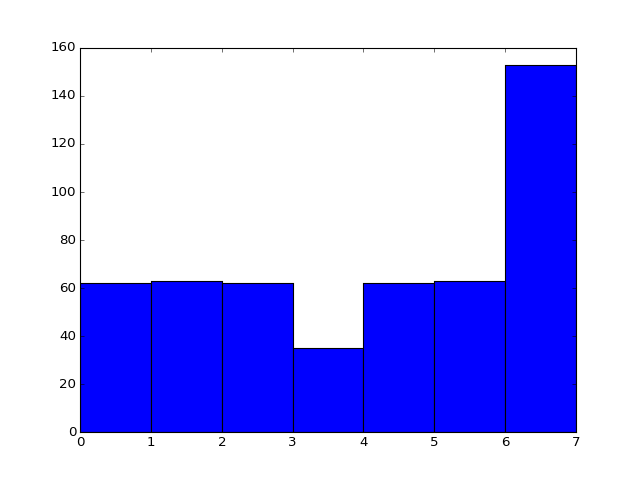

In [5]:
import matplotlib.pyplot as plt
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()  